<a href="https://colab.research.google.com/github/lucas-prado/data_science_portfolio/blob/main/%5BPROJETO%5D_Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avaliação de Risco de Crédito


Uma das áreas que causa mais problemas para bancos, financiadoras e empresários é a taxa de inadimplência por parte da sua carteira de clientes.

Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de *default*. 

*Default* é o termo utilizado para o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é a incapacidade financeira do cliente.

<p align=center>
  <img src="https://images.unsplash.com/photo-1556742502-ec7c0e9f34b1?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=687&q=80" width="40%">
</p>
 
Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes.

Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

## Contextualização do Problema

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não coumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito.

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/10/Nubank_logo.png" width="90px"></p>
  
Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).



> OBJETIVO: Criar um modelo que forneça a probabilidade de um cliente virar inadimplente.


Espera-se que um modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.



## **IMPORTAÇÃO DOS DADOS**

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

In [ ]:
#importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, plot_confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format


In [ ]:
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

In [ ]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.00,101.80,0.26,108.43,0.40,"25,033.92",...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,"57,849.00",BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.00,97.06,0.94,92.00,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,"4,902.00",BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.00,100.03,0.35,112.89,0.29,"7,207.92",...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,"163,679.00",BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.00,101.60,0.99,94.90,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,"1,086.00",BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.00,98.47,0.53,118.13,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,"198,618.00",BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [ ]:
#Dimensões do DataFrame

df.shape

(45000, 43)

In [ ]:
#Verificando o nome das colunas

df.columns

Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')

## **TRATAMENTO DOS DADOS**

**LIMPEZA DOS DADOS:**

* Limpar colunas com variáveis sem informações relevantes.
* Limpar colunas que possuam apenas um valor.
* Limpar colunas que possuam mais de 50% de valores nulos (excessão para last_amount_borrowed, por ser uma informação relevante para default).
* Limpar as linhas de variáveis nulas da variável target (target_default).

**TRATAMENTO DOS VALORES:**

* Tratar os valores incorretos da coluna "e-mail"
* Retirar "BR-" da coluna "shipping_state."
* Substituir a variável target (Target Default) por 0 e 1.



In [ ]:
#Analisando valores de cada coluna.

for c in df.columns:
  print(f"NOME DA COLUNA: {c} \n")
  print(f"NÚMERO DE VALORES ÚNICOS: {df[c].nunique()} \n")
  print(f"{df[c].unique()[:10]} \n")

NOME DA COLUNA: ids 

NÚMERO DE VALORES ÚNICOS: 45000 

['343b7e7b-2cf8-e508-b8fd-0a0285af30aa'
 'bc2c7502-bbad-0f8c-39c3-94e881967124'
 '669630dd-2e6a-0396-84bf-455e5009c922'
 'd235609e-b6cb-0ccc-a329-d4f12e7ebdc1'
 '9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b'
 '538c1908-bd80-b834-c3f0-238b4f536d3f'
 'cd23a767-efe7-46fe-18c7-59b93f2e6e72'
 '7552f149-5c7b-9e10-24a0-55978ee4ff5b'
 '2bf379e3-51e3-2f7c-168f-3d494e2d2b5b'
 '4146cbf8-1ec5-f381-e5c4-1ffad3a3e37e'] 

NOME DA COLUNA: target_default 

NÚMERO DE VALORES ÚNICOS: 2 

[False True nan] 

NOME DA COLUNA: score_1 

NÚMERO DE VALORES ÚNICOS: 7 

['1Rk8w4Ucd5yR3KcqZzLdow==' 'DGCQep2AE5QRkNCshIAlFQ=='
 '8k8UDR4Yx0qasAjkGrUZLw==' '4DLlLW62jReXaqbPaHp1vQ=='
 'e4NYDor1NOw6XKGE60AWFw==' 'smzX0nxh5QlePvtVf6EAeg=='
 'fyrlulOiZ+5hoFqLa6UbDQ==' nan] 

NOME DA COLUNA: score_2 

NÚMERO DE VALORES ÚNICOS: 35 

['IOVu8au3ISbo6+zmfnYwMg==' 'SaamrHMo23l/3TwXOWgVzw=='
 'Fv28Bz0YRTVAT5kl1bAV6g==' 'dCm9hFKfdRm7ej3jW+gyxw=='
 '+CxEO4w7jv3QPI/BQbyqAA==' 'tQUTfUy

In [ ]:
#Análise de valores nulos

(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

target_fraud                                       0.97
last_amount_borrowed                               0.67
last_borrowed_in_months                            0.67
ok_since                                           0.59
external_data_provider_credit_checks_last_2_year   0.50
external_data_provider_credit_checks_last_year     0.34
credit_limit                                       0.31
n_issues                                           0.26
facebook_profile                                   0.10
marketing_channel                                  0.08
job_name                                           0.07
target_default                                     0.07
external_data_provider_email_seen_before           0.05
lat_lon                                            0.03
user_agent                                         0.02
n_bankruptcies                                     0.02
n_defaulted_loans                                  0.01
reason                                          

In [ ]:
#Analisando tipagem das colunas

df.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

In [ ]:
#Eliminando as colunas

#analisar depois last_amount_borrowed e last_borrowed_in_months.

df.drop(columns=["ids", "score_1", "score_2", "reason", "state", "zip", "channel", "job_name", 
                 "real_state", "external_data_provider_credit_checks_last_2_year", "external_data_provider_first_name", "profile_phone_number", 
                 "profile_tags", "user_agent", "target_fraud", "ok_since", "last_borrowed_in_months"], inplace=True)

In [ ]:
#Eliminando linhas

df.dropna(subset=["target_default"], inplace=True)

In [ ]:
df.external_data_provider_credit_checks_last_year.unique()

array([ 0., nan,  1.])

In [ ]:
#Tratando valores e tipagens nas colunas.

df["external_data_provider_credit_checks_last_year"] = df["external_data_provider_credit_checks_last_year"].astype(str).replace('nan', np.nan)
df["shipping_state"] = df["shipping_state"].str.replace("BR-","")
df["email"] = df["email"].str.replace("hotmaill.com","hotmail.com").str.replace("gmaill.com","gmail.com")

In [ ]:
df.external_data_provider_credit_checks_last_year.unique()

array(['0.0', nan, '1.0'], dtype=object)

In [ ]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

last_amount_borrowed                              0.66
external_data_provider_credit_checks_last_year    0.34
credit_limit                                      0.31
n_issues                                          0.26
facebook_profile                                  0.10
marketing_channel                                 0.08
external_data_provider_email_seen_before          0.05
lat_lon                                           0.03
n_bankruptcies                                    0.00
n_defaulted_loans                                 0.00
email                                             0.00
shipping_state                                    0.00
reported_income                                   0.00
external_data_provider_fraud_score                0.00
external_data_provider_credit_checks_last_month   0.00
target_default                                    0.00
application_time_in_funnel                        0.00
application_time_applied                          0.00
score_3   

## **TRATAMENTO DOS VALORES NULOS:**

* Tratamento específico para a variável "last_amount_borrowed" e para a variável "credit_limit".
* Usar a mediana para as demais variáveis numéricas por conta de outliers.
* Usar a moda para variáveis categóricas.

In [ ]:
#Tratamento das variáveis
null_values = list()
null_categorical = list()

for i, c in enumerate(df.columns):
  if df[c].isnull().sum() != 0:
    if df.dtypes[i] == "O":
      null_categorical.append(c)
    else:
      null_values.append(c)

In [ ]:
df[null_values].describe().T

,count,mean,std,min,25%,50%,75%,max
last_amount_borrowed,"14,133.00","13,328.10","7,918.70","1,005.18","7,210.28","12,011.05","18,030.16","35,059.60"
credit_limit,"28,632.00","33,877.22","36,141.99",0.00,"9,975.00","25,213.00","46,492.50","448,269.00"
n_bankruptcies,"41,606.00",0.08,0.27,0.00,0.00,0.00,0.00,5.00
n_defaulted_loans,"41,729.00",0.00,0.08,0.00,0.00,0.00,0.00,5.00
n_issues,"30,818.00",11.02,4.60,0.00,8.00,10.00,14.00,49.00
external_data_provider_email_seen_before,"39,656.00",12.73,125.71,-999.00,11.00,27.00,43.00,59.00


#### **TRATAMENTO DE VALORES NULOS - LAST_AMOUNT_BORROWED E CREDIT_LIMIT**

* É provável que as variáveis "last_amount_borrowed" e "credit_limit" estejam diretamente relacionadas às condições de renda do cliente, visto que instituições financeiras decidem o quanto prover de limite e o quanto emprestar de crédito, baseadas nas condições de renda do cliente.

* Portanto, seria incorreto apenas atribuir a mediana de uma distribuição a clientes com características de renda distintas.

In [ ]:
df_fillna = df.copy()

In [ ]:
df_fillna.fillna(0, inplace=True)

In [ ]:
df_amount_zero = df_fillna[['last_amount_borrowed', 'target_default']].loc[df_fillna.last_amount_borrowed == 0]
df_credit_zero = df_fillna[['credit_limit', 'target_default']].loc[df_fillna.credit_limit == 0]

* Primeiramente, partiu-se do ponto que os valores nulos poderiam ser clientes que não possuiam nem crédito tomado nem limite de crédito.

* Visto isso, foi tomada a decisão de verificar se existiam valores "Trues" da variável target em relação aos valores nulos da variável de crédito tomado e de limite de crédito.

* Se a presença fosse confirmada, é impossível que clientes que não possuam limite de crédito nem crédito tomado sejam inandimplentes.

* Portanto, as variáveis deveriam ser tratadas de maneiras distintas.

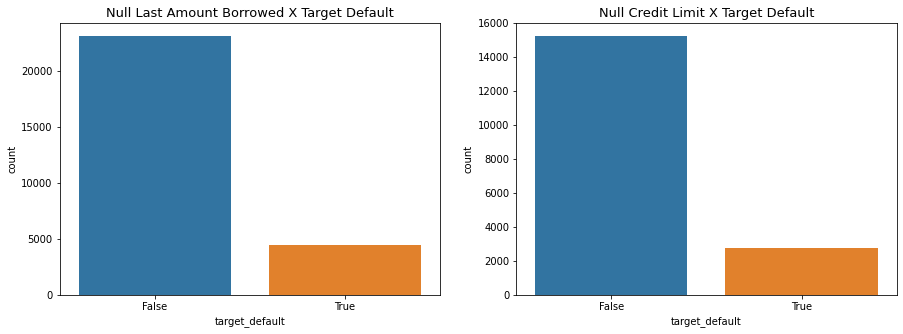

In [ ]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(15,5))

sns.countplot(x='target_default', data=df_amount_zero, ax=ax1)
sns.countplot(x='target_default', data=df_credit_zero, ax=ax2)

ax1.set_title('Null Last Amount Borrowed X Target Default', size=13)
ax2.set_title('Null Credit Limit X Target Default', size=13)

plt.show();

* Como a presença de valores "True" da variável target foi confirmada, optou-se por fazer uma análise mais aprofundada para entender como os valores não nulos das variáveis "last_amount_borrowed" e "credit_limit" se comportam frente às classificações da variável target.

* Para isso, foram criadas as variáveis **"amount_x_income"** e **"credit_x_income"** para entender como as variáveis de crédito e limite de crédito se comportam em relação à renda do cliente.



In [ ]:
df_amount_analyse = df_fillna[["income","last_amount_borrowed", "target_default"]].loc[df_fillna.last_amount_borrowed != 0]
df_credit_analyse = df_fillna[["income","credit_limit", "target_default"]].loc[df_fillna.last_amount_borrowed != 0]

In [ ]:
df_amount_analyse["amount_x_income"] = df_amount_analyse["last_amount_borrowed"]/df_amount_analyse['income']
df_credit_analyse["credit_x_income"] = df_credit_analyse["credit_limit"]/df_credit_analyse['income']

In [ ]:
df_amount_analyse_false = df_amount_analyse.loc[df_amount_analyse['target_default']==False] 
df_amount_analyse_true = df_amount_analyse.loc[df_amount_analyse['target_default']==True]

df_credit_analyse_false = df_credit_analyse.loc[df_credit_analyse['target_default']==False] 
df_credit_analyse_true = df_credit_analyse.loc[df_credit_analyse['target_default']==True] 

#### **ANÁLISE DE BOXPLOT - LAST_AMOUNT_BORROWED E CREDIT_LIMIT**

**last_amount_borrowed:**

* presença maior de outliers quando a variável target é "False".
* possivelmente, um uso da mediana precarizaria mais a previsão das classificações da varíavel target "False" em relação à "True".

**credit_limit:**

* presença maior de outliers em ambas as classificações da variável target.
* necessário mais análise para verificar qual seria a melhor maneira de fazer o tratamento dos valores nulos.



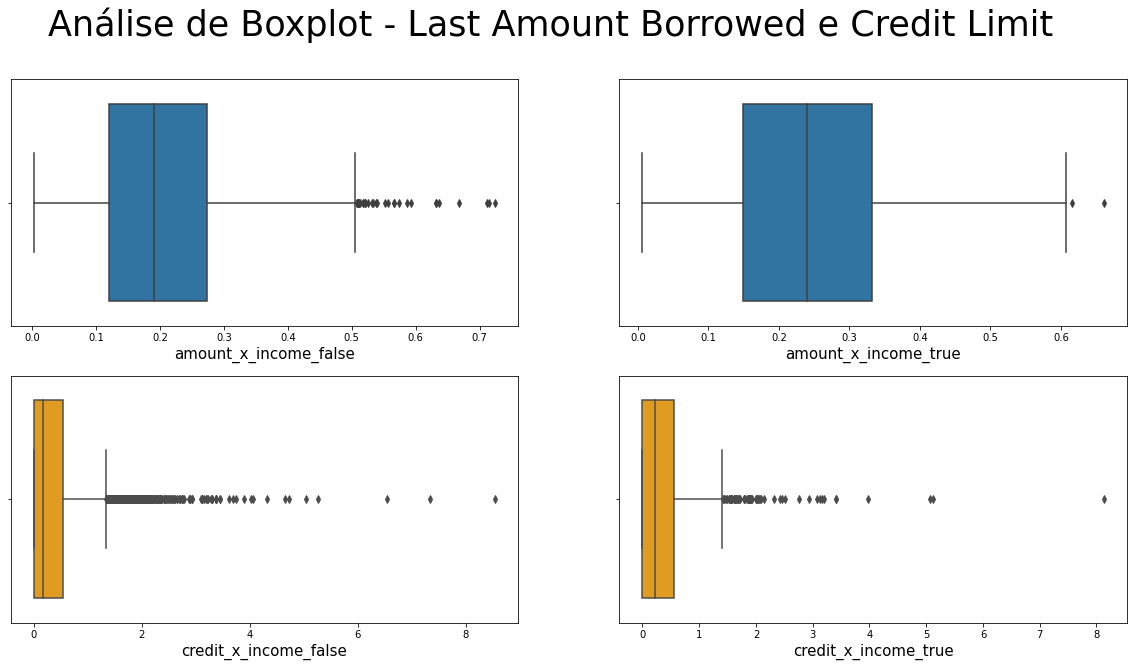

In [ ]:
fig, [[ax1, ax2],[ax3,ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

plt.suptitle("Análise de Boxplot - Last Amount Borrowed e Credit Limit", size=35)

sns.boxplot(df_amount_analyse_false["amount_x_income"], ax=ax1)
ax1.set_xlabel("amount_x_income_false", size=15)

sns.boxplot(df_amount_analyse_true["amount_x_income"], ax=ax2)
ax2.set_xlabel("amount_x_income_true", size=15)

sns.boxplot(df_credit_analyse_false["credit_x_income"], color='orange', ax=ax3)
ax3.set_xlabel("credit_x_income_false", size=15)

sns.boxplot(df_credit_analyse_true["credit_x_income"], color='orange',ax=ax4)
ax4.set_xlabel("credit_x_income_true", size=15)

plt.show();

#### **ANÁLISE DE HISTOGRAMA - LAST_AMOUNT_BORROWED E CREDIT_LIMIT**

**last_amount_borrowed:**

* As duas distribuições para cada uma das classificações da variável target possuem distribuições semelhantes. Portanto, não existe tanta discrepância entre como os clientes adimplentes e inadimplentes se comportam em relação aos pagamentos, frente à sua renda.

**credit_limit:**

* As duas distribuições para cada uma das classificações da variável target possuem distribuições semelhantes. Portanto, não existe tanta discrepância em relação ao limite de crédito entre clientes adimplentes e inadimplentes, frente à sua renda..

* Percebe-se uma frequência muito maior entre a proporção de 0 a 1 do que em valores mais extremos. Isso pode ser um indício para validar o uso da mediana, independente de outliers.





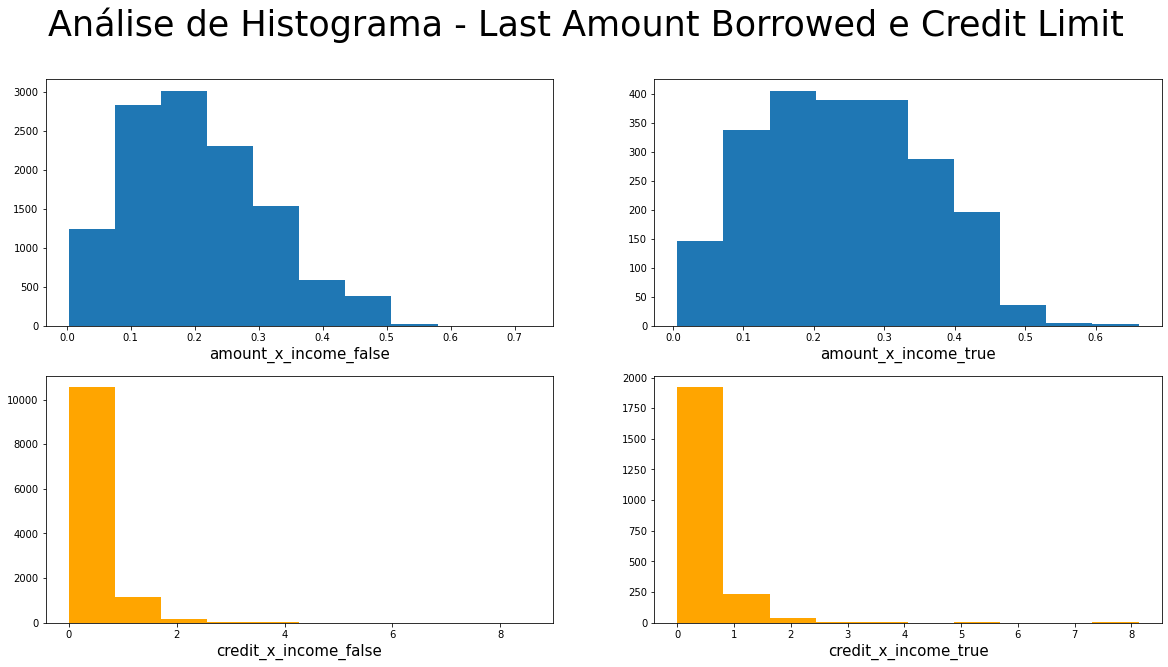

In [ ]:
fig, [[ax1, ax2],[ax3,ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

plt.suptitle("Análise de Histograma - Last Amount Borrowed e Credit Limit", size=35)

ax1.hist(df_amount_analyse_false["amount_x_income"])
ax1.set_xlabel("amount_x_income_false", size=15)

ax2.hist(df_amount_analyse_true["amount_x_income"])
ax2.set_xlabel("amount_x_income_true", size=15)

ax3.hist(df_credit_analyse_false["credit_x_income"], color='orange')
ax3.set_xlabel("credit_x_income_false", size=15)

ax4.hist(df_credit_analyse_true["credit_x_income"], color='orange')
ax4.set_xlabel("credit_x_income_true", size=15)

plt.show();

* Foram escolhidas, portanto, as respectivas medianas, multiplicadas pela renda de cada indivíduo, em relação a cada uma das distribuições da variável target, para substituir os valores nulos das respectivas variáveis.

In [ ]:
m1 = df["target_default"] == True
m2 = df["target_default"] == False

df.loc[m1,'last_amount_borrowed'] = df.loc[m1,'last_amount_borrowed'].fillna(df.loc[m1,'income']*df_amount_analyse_true['amount_x_income'].median())
df.loc[m2,'last_amount_borrowed'] = df.loc[m2,'last_amount_borrowed'].fillna(df.loc[m2,'income']*df_amount_analyse_false['amount_x_income'].median())

df.loc[m1,'credit_limit'] = df.loc[m1,'credit_limit'].fillna(df.loc[m1,'income']*df_credit_analyse_true['credit_x_income'].median())
df.loc[m2,'credit_limit'] = df.loc[m2,'credit_limit'].fillna(df.loc[m2,'income']*df_credit_analyse_false['credit_x_income'].median())

In [ ]:
df.isnull().sum().sort_values()

target_default                                         0
reported_income                                        0
external_data_provider_fraud_score                     0
external_data_provider_credit_checks_last_month        0
email                                                  0
application_time_in_funnel                             0
application_time_applied                               0
shipping_state                                         0
n_accounts                                             0
score_5                                                0
score_3                                                0
score_4                                                0
income                                                 0
score_6                                                0
risk_rate                                              0
shipping_zip_code                                      0
credit_limit                                           0
last_amount_borrowed           

#### **TRATAMENTO DE VALORES NULOS - DEMAIS VARIÁVEIS**

* Para as demais variáveis, foram utilizadas os valores de mediana e moda da distribuição.

In [ ]:
null_values.remove('last_amount_borrowed')
null_values.remove('credit_limit')

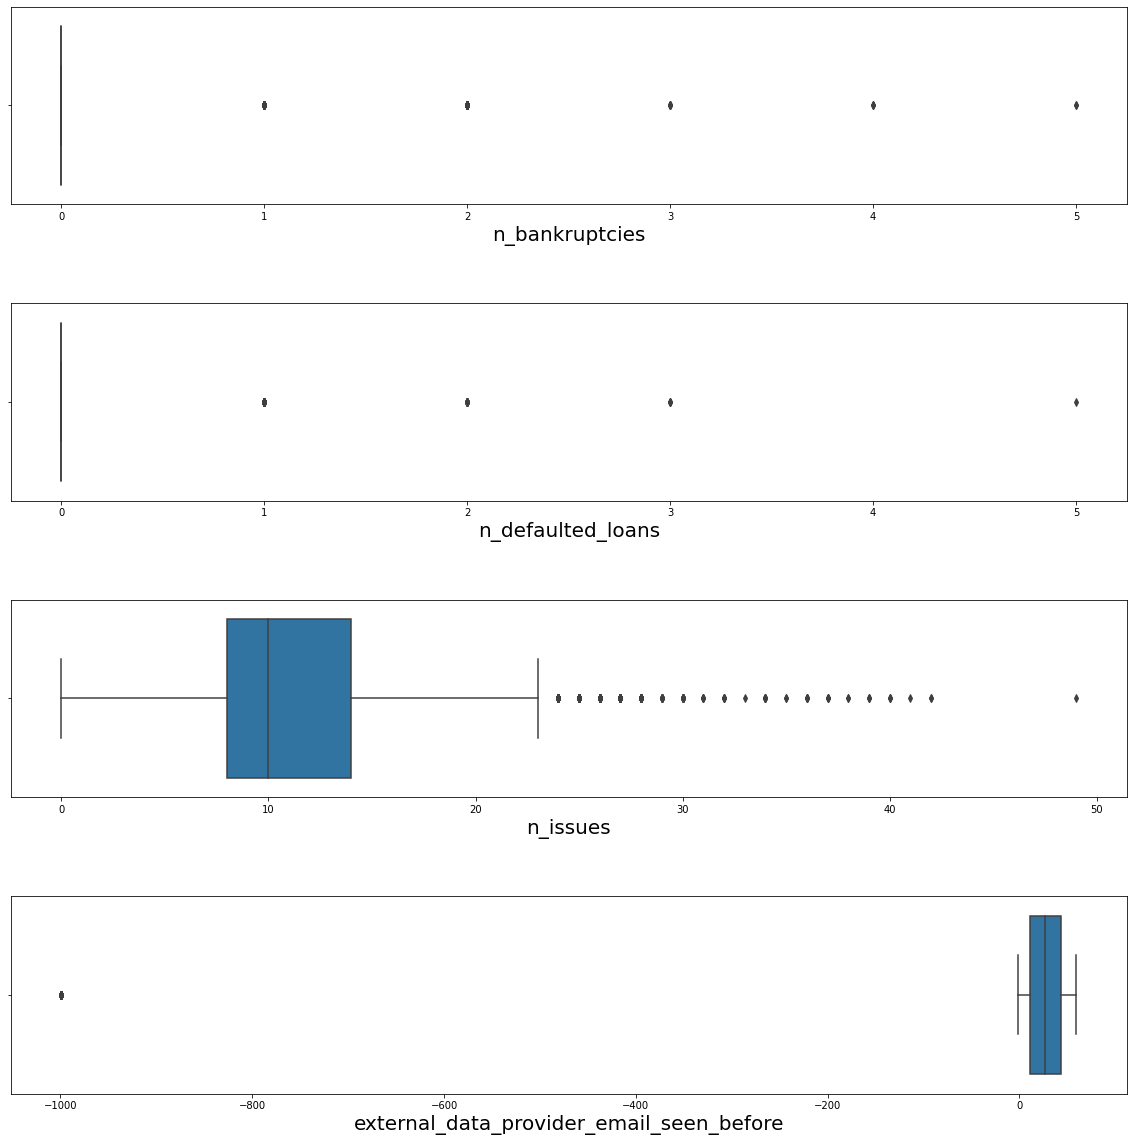

In [ ]:
fig, ax = plt.subplots(nrows=4, figsize=(20, 20))

plt.subplots_adjust(hspace=0.5)

for i, c in enumerate(null_values):
  sns.boxplot(df[c], ax=ax[i])
  ax[i].set_xlabel(c, size=20)

plt.show();

In [ ]:
#substituindo pela mediana.

for c in null_values:
  df[c].fillna(df[c].median(), inplace=True)

#substituindo pela moda.

for c in null_categorical:
  df[c].fillna(df[c].mode().iloc[0], inplace=True)

## **TRATAMENTO DE OUTLIERS**

**COLUNAS TRATADAS:**

* **reported_income:** Tratamento de valores infinitos e outliers.
* **external_data_provider_email_seen_before:** Eliminação de valores negativos.

**OBS:** em termos de outliers, as demais variáveis apresentaram valores que podem ser consistentes com a realidade.


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score_3,"41,741.00",346.46,110.10,0.00,270.00,340.00,420.00,990.00
score_4,"41,741.00",100.01,3.18,86.19,97.86,100.02,102.14,113.98
score_5,"41,741.00",0.50,0.29,0.00,0.25,0.50,0.75,1.00
score_6,"41,741.00",99.92,10.02,60.66,93.18,99.98,106.63,142.19
risk_rate,"41,741.00",0.29,0.10,0.00,0.22,0.29,0.36,0.90
last_amount_borrowed,"41,741.00","13,873.76","9,890.49",922.97,"8,238.21","12,021.41","17,294.79","957,204.88"
credit_limit,"41,741.00","27,116.96","31,914.09",0.00,"8,001.16","16,794.00","35,516.00","448,269.00"
income,"41,741.00","71,080.12","52,259.78","4,821.18","44,019.58","60,044.09","85,032.89","5,000,027.83"
n_bankruptcies,"41,741.00",0.08,0.27,0.00,0.00,0.00,0.00,5.00
n_defaulted_loans,"41,741.00",0.00,0.08,0.00,0.00,0.00,0.00,5.00


In [ ]:
numerical_values = list()
categorical_values = list()

for c in df.columns:
  if df[c].dtypes == "O" or df[c].dtypes == "bool":
    categorical_values.append(c)
  else:
    numerical_values.append(c) 

In [ ]:
df[numerical_values].describe().T

,count,mean,std,min,25%,50%,75%,max
score_3,"41,741.00",346.46,110.10,0.00,270.00,340.00,420.00,990.00
score_4,"41,741.00",100.01,3.18,86.19,97.86,100.02,102.14,113.98
score_5,"41,741.00",0.50,0.29,0.00,0.25,0.50,0.75,1.00
score_6,"41,741.00",99.92,10.02,60.66,93.18,99.98,106.63,142.19
risk_rate,"41,741.00",0.29,0.10,0.00,0.22,0.29,0.36,0.90
last_amount_borrowed,"41,741.00","13,873.76","9,890.49",922.97,"8,238.21","12,021.41","17,294.79","957,204.88"
credit_limit,"41,741.00","27,116.96","31,914.09",0.00,"8,001.16","16,794.00","35,516.00","448,269.00"
income,"41,741.00","71,080.12","52,259.78","4,821.18","44,019.58","60,044.09","85,032.89","5,000,027.83"
n_bankruptcies,"41,741.00",0.08,0.27,0.00,0.00,0.00,0.00,5.00
n_defaulted_loans,"41,741.00",0.00,0.08,0.00,0.00,0.00,0.00,5.00


In [ ]:
print(f"""número de infinitos: {df.loc[df["reported_income"] == float('inf')].shape[0]}""")

número de infinitos: 66


In [ ]:
inf_income = df.loc[(df["reported_income"] == float("inf"))].index

df.drop(axis=0, index=inf_income, inplace=True)

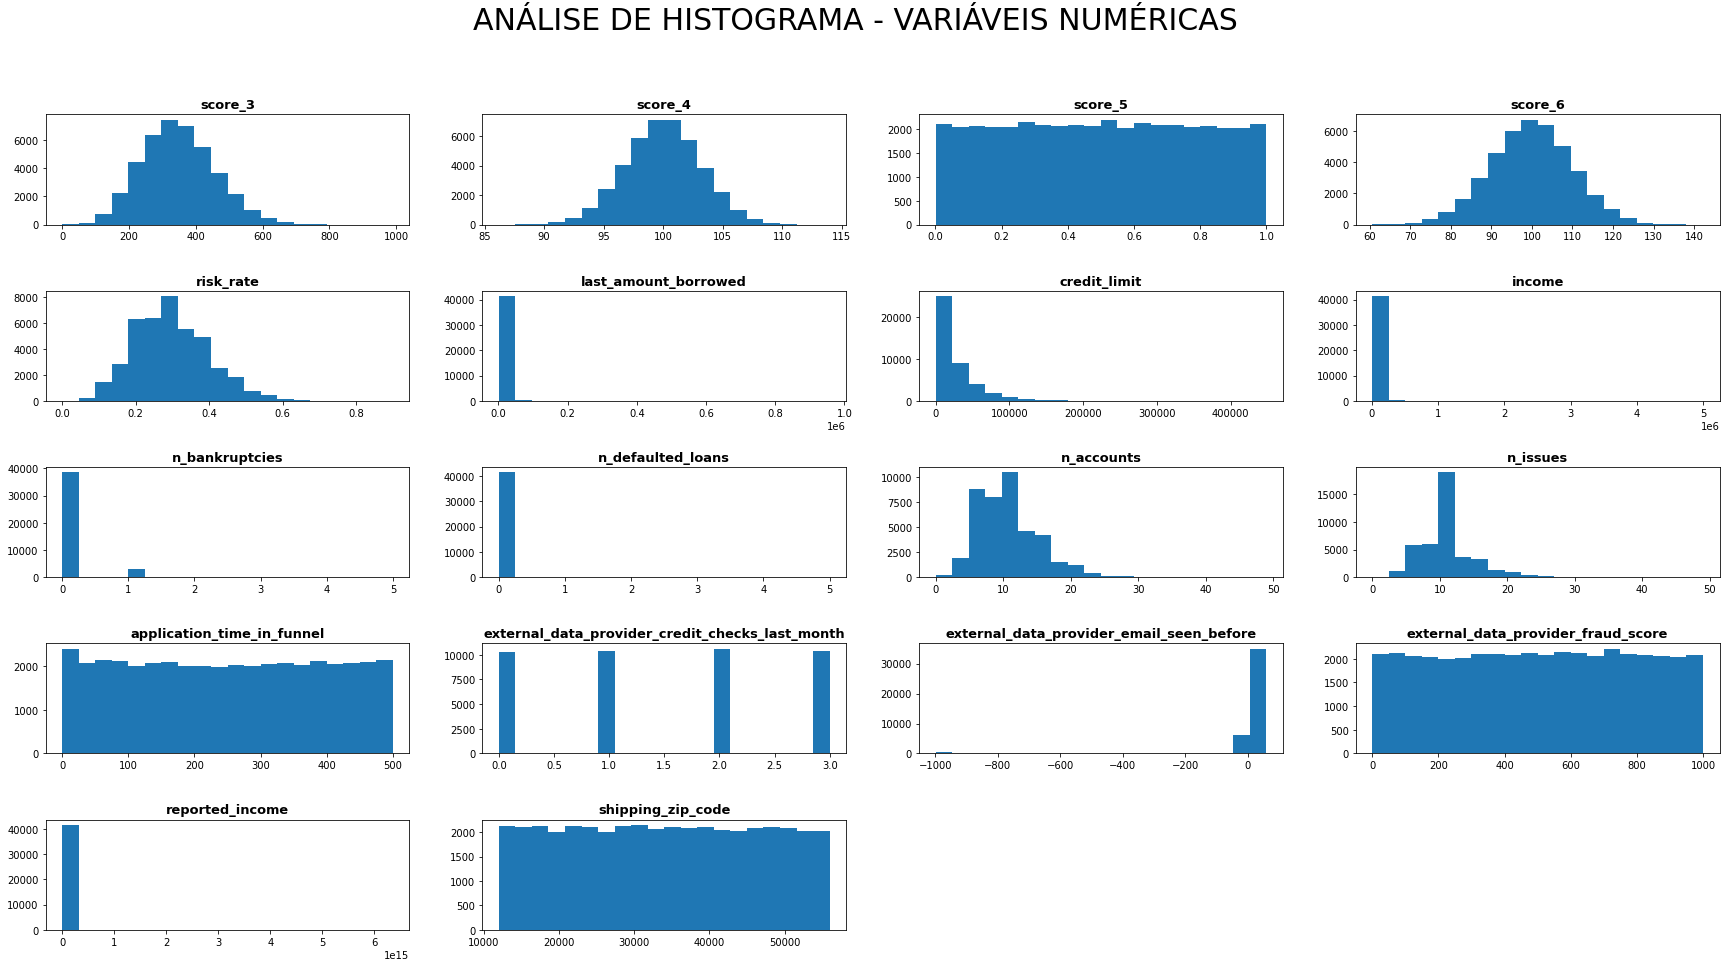

In [ ]:
fig = plt.figure(figsize=(30,15))

plt.subplots_adjust(hspace=0.6)
plt.suptitle("ANÁLISE DE HISTOGRAMA - VARIÁVEIS NUMÉRICAS", size = 30)

for i, c in enumerate(numerical_values):
  globals()[f"ax{i+1}"] = fig.add_subplot(5, 4, i+1)
  globals()[f"ax{i+1}"].set_title(c, weight="bold", size=13)
  globals()[f"ax{i+1}"].hist(df[c], bins=20)

plt.show();

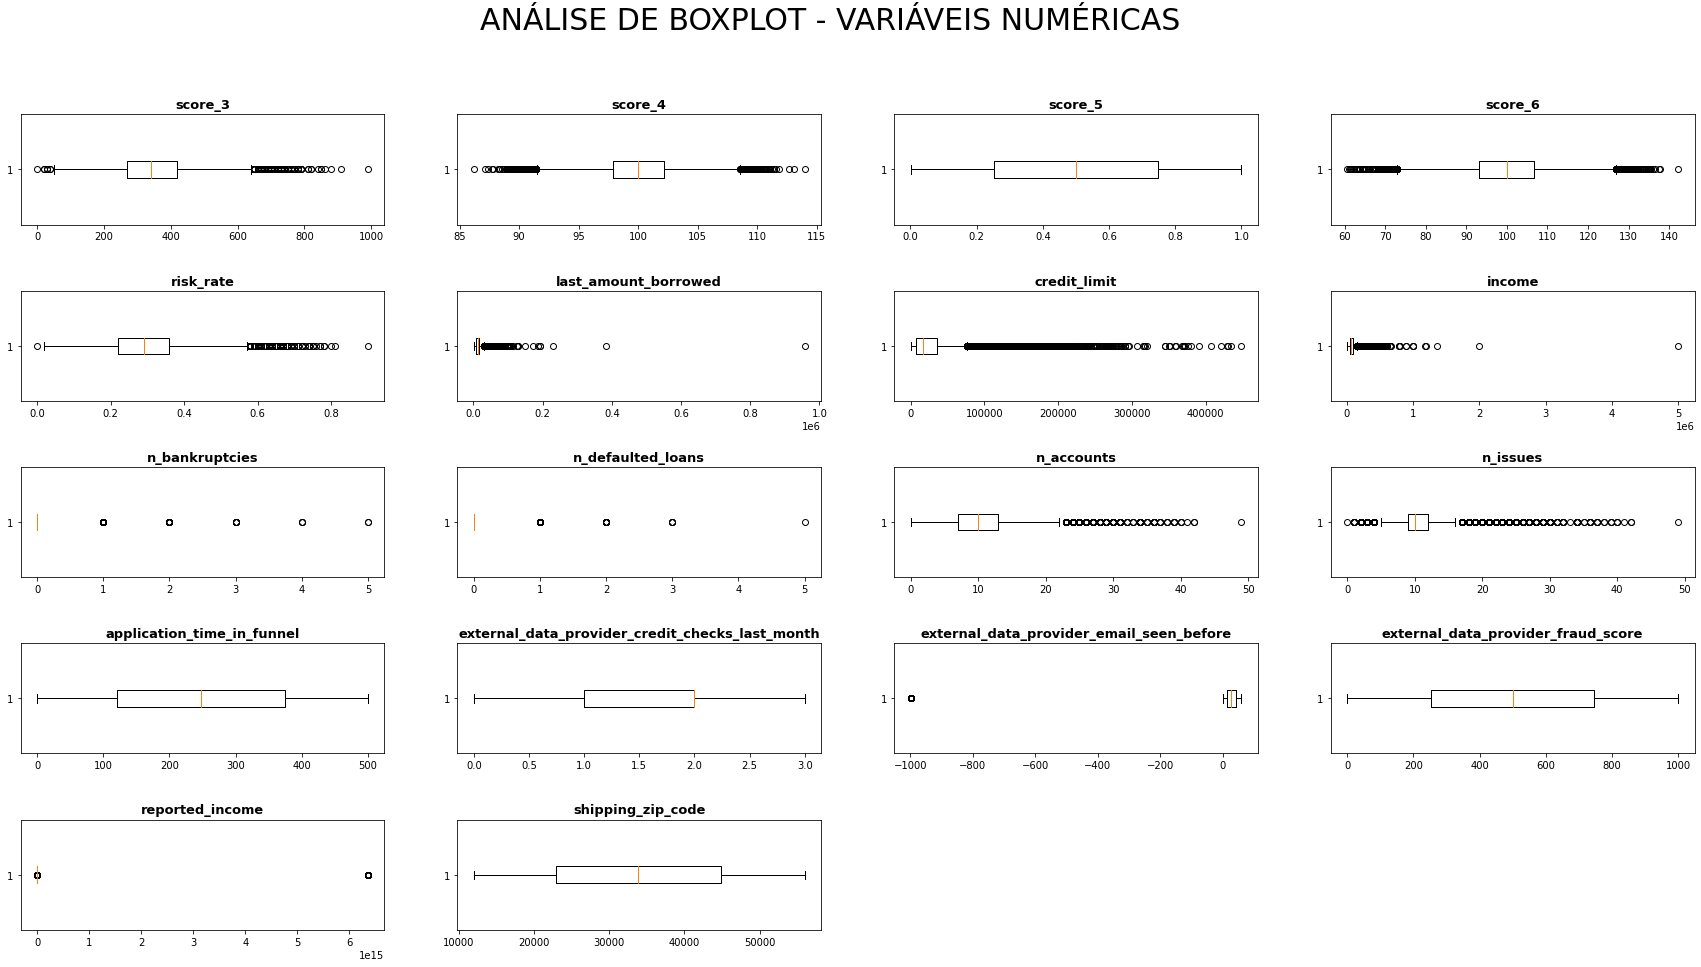

In [ ]:
fig = plt.figure(figsize=(30,15))

plt.subplots_adjust(hspace=0.6)
plt.suptitle("ANÁLISE DE BOXPLOT - VARIÁVEIS NUMÉRICAS", size = 30)

for i, c in enumerate(numerical_values):
  globals()[f"ax{i+1}"] = fig.add_subplot(5, 4, i+1)
  globals()[f"ax{i+1}"].set_title(c, weight="bold", size=13)
  globals()[f"ax{i+1}"].boxplot(df[c], vert=False)

plt.show();

#### **TRATAMENTO REPORTED_INCOME**

**DELETAR OUTLIERS:**

* valores muito discrepantes com a possível realidade.
* poucos valores existentes na base, não comprometendo o volume de dados.
* valores excluídos concentrados em variáveis categóricas que possuem maior quantidade no dataset.

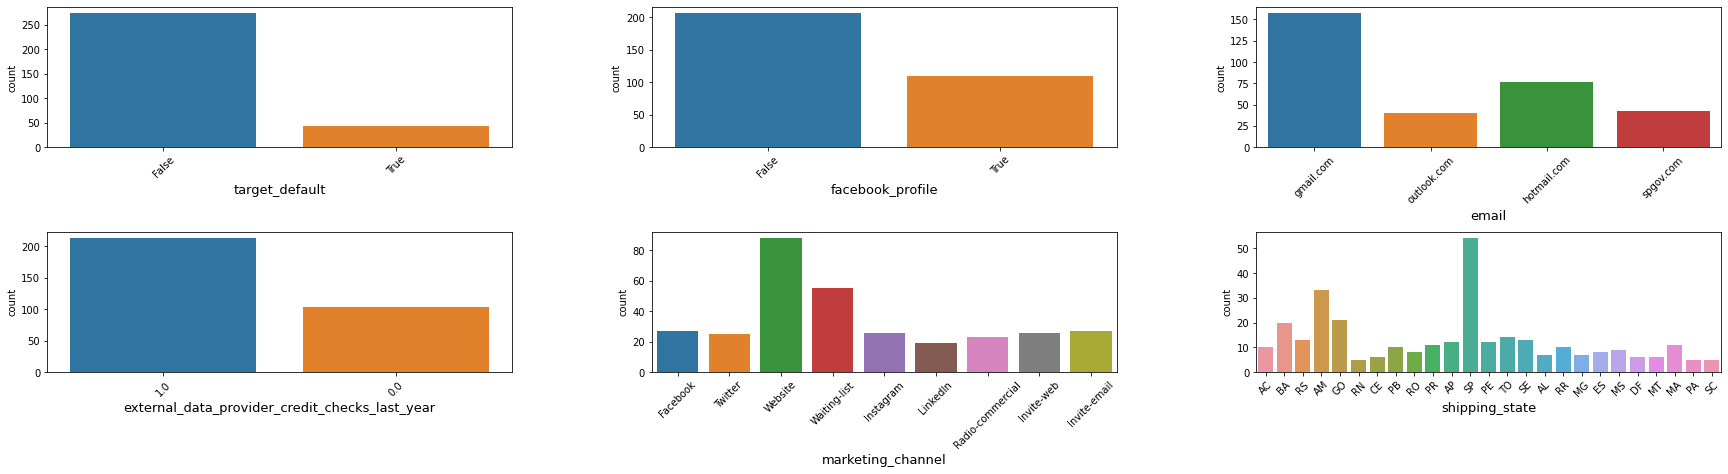

In [ ]:
rep_inc_treated = df.loc[(df["reported_income"] >= 1000000)]
i = 0

fig = plt.figure(figsize=(30,15))
plt.subplots_adjust(hspace=0.6, wspace= 0.3)

for c in categorical_values:
  i += 1
  if c == 'lat_lon' or c == 'application_time_applied':
    i += -1
    pass
  else:
    globals()[f"ax{i}"] = fig.add_subplot(4, 3, i)
    sns.countplot(x=c, data=rep_inc_treated, ax=globals()[f"ax{i}"])
    globals()[f"ax{i}"].tick_params(labelrotation=45, axis='x')
    globals()[f"ax{i}"].set_xlabel(c, size=13)


plt.show();

In [ ]:
df_ex_out = df.copy()

out_income = df.loc[(df["reported_income"] > 1300000)].index

df_ex_out.drop(axis=0, index=out_income, inplace=True)

#### **TRATAMENTO EXTERNAL_DATA_PROVIDER_EMAIL_SEEN_BEFORE**

**DELETAR OUTLIERS:**

* valores muito discrepantes com a possível realidade.
* poucos valores existentes na base, não comprometendo o volume de dados.
* valores excluídos concentrados em variáveis categóricas que possuem maior quantidade no dataset.

In [ ]:
df_ex_out.external_data_provider_email_seen_before.loc[df_ex_out.external_data_provider_email_seen_before < 0].value_counts()

-1.00      596
-999.00    588
Name: external_data_provider_email_seen_before, dtype: int64

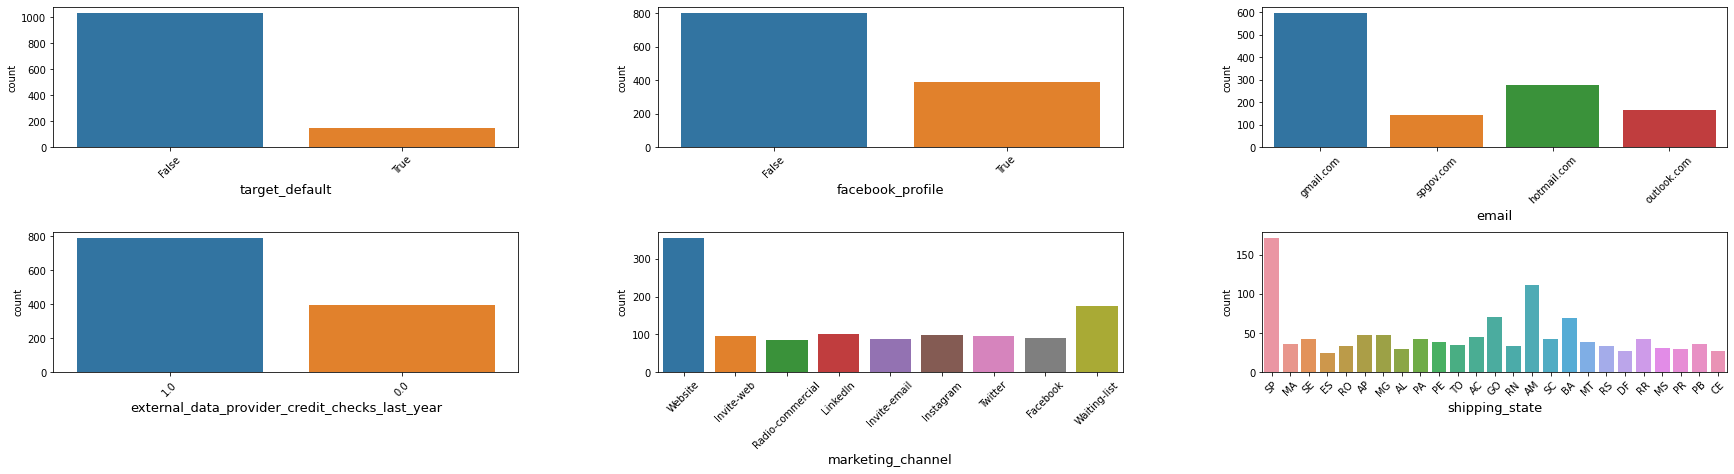

In [ ]:
rep_ext_data_treated = df_ex_out.loc[df_ex_out.external_data_provider_email_seen_before < 0]
i = 0

fig = plt.figure(figsize=(30,15))
plt.subplots_adjust(hspace=0.6, wspace= 0.3)

for c in categorical_values:
  i += 1
  if c == 'lat_lon' or c=='application_time_applied':
    i += -1
    pass
  else:
    globals()[f"ax{i}"] = fig.add_subplot(4,3, i)
    sns.countplot(x=c, data=rep_ext_data_treated, ax=globals()[f"ax{i}"])
    globals()[f"ax{i}"].tick_params(labelrotation=45, axis='x')
    globals()[f"ax{i}"].set_xlabel(c, size=13)


plt.show();

In [ ]:
out_ext_data = df_ex_out.loc[(df["external_data_provider_email_seen_before"] < 0) ].index

df_ex_out.drop(axis=0, index=out_ext_data, inplace=True)

In [ ]:
df.shape

(41675, 26)

In [ ]:
df_ex_out.shape

(40296, 26)

## **FEATURE ENGINEERING**

* A variável "application_time_applied" foi tratada, a fim de se tornar mais explicativa ao modelo e mais generalista na previsão da variável target.

In [ ]:
df_ex_out.application_time_applied.sort_values()

2938     00:00:02
42029    00:00:06
26459    00:00:10
10933    00:00:15
19325    00:00:16
           ...   
4631     24:60:49
23232    24:60:51
3070     24:60:55
18070    24:60:57
19121    24:60:58
Name: application_time_applied, Length: 40296, dtype: object

* Separamos a "string" pelos dois pontos ":" e selecionamos os primeiros valores que vão de 0 à 24.

In [ ]:
df_ex_out["application_time_applied"] = df_ex_out.application_time_applied.str.split(":", n=1, expand=True)[:][0]

df_ex_out['application_time_applied'] = df_ex_out['application_time_applied'].astype(int)

* Agrupamos a variável transformada pela variável target e criamos um DataFrame para analisar graficamente se existe algum padrão de comportamento entre a nova "application_time_applied" e a variável target "TRUE", referente ao default do cliente.

In [ ]:
df_grouped = df_ex_out.groupby(["application_time_applied", "target_default"])["target_default"].count().unstack()

app_dict = dict()

app_dict["False"] = df_grouped[False].to_list()
app_dict["True"] = df_grouped[True].to_list()

In [ ]:
app_grouped = pd.DataFrame(data=app_dict, index=df_grouped.index)

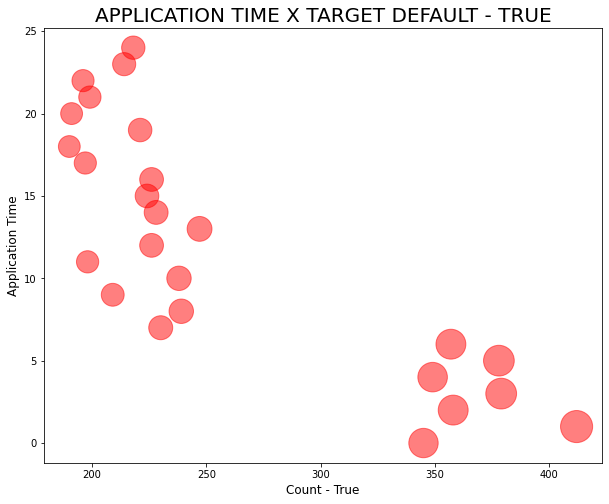

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

area = ((app_grouped["True"])**1/2)*5

ax.scatter(x=app_grouped["True"], y=app_grouped.index, s=area,  alpha=0.5, color=['red'])
ax.set_title("APPLICATION TIME X TARGET DEFAULT - TRUE", size=20)
ax.set_xlabel("Count - True", size=12)
ax.set_ylabel("Application Time", size=12)

plt.show()

* Percebeu-se que a maior quantidade de valores "TRUE" ocorreram entre os intervalos de 0 a 6 da nova variável transformada.

* Entendido isso, retratamos a coluna, para maior generalização e otimização dos processos, segregando as variáveis em blocos de 6.

* Criaram-se os valores "6", "12", "18" e "24".

In [ ]:
conditions = [
              df_ex_out["application_time_applied"] <= 6,
              df_ex_out["application_time_applied"] <= 12,
              df_ex_out["application_time_applied"] <= 18,
              df_ex_out["application_time_applied"] <= 24,
]

choices = [
           "6",
           "12",
           "18",
           "24"           
]

df_ex_out["application_time_applied"] = np.select(conditions, choices, default=">25")

## **ANÁLISE DE BALANCEAMENTO DE DADOS**

**INSIGHT DOS DADOS:**

* target_default: maior presença de não ocorrência de default.
* facebook_profile: maior presença de não ocorrência de perfil.
* application_time_applied: maior presença de ocorrência da variável "6".
* email: maior presença de 'gmail'.
* external_data_provider_credit_checks_last_year: maior presença da variável "1".
* marketing_channel: maior presença da variável 'website'.
* shipping_state: maior presença da variável "SP".

**OBS:**  a estrutura de balanceamento das variáveis categóricas não foi comprometida após eliminação dos outliers.

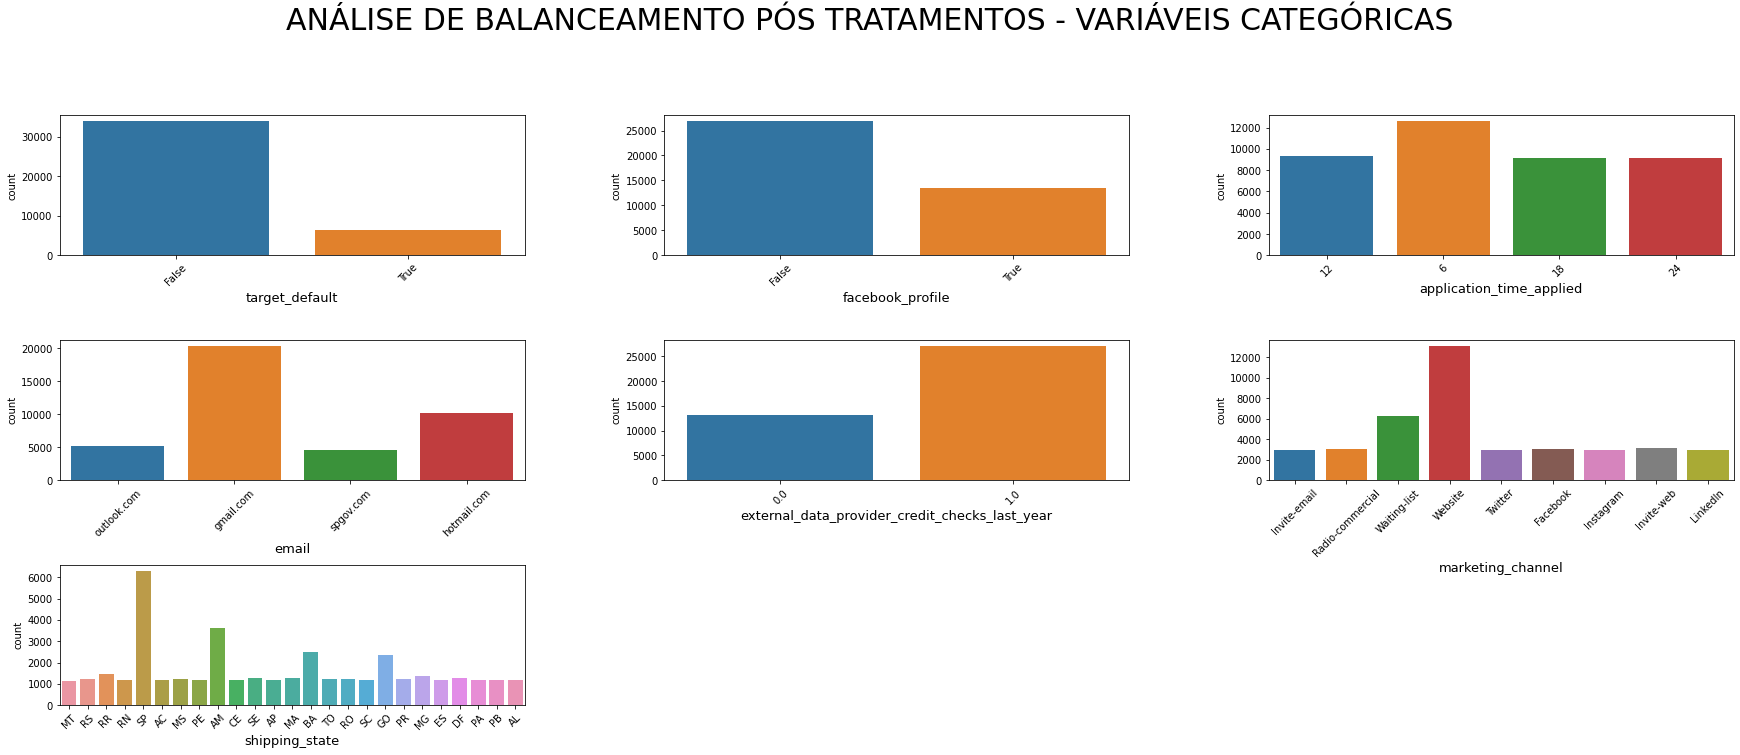

In [ ]:
i = 0

fig = plt.figure(figsize=(30,15))
plt.subplots_adjust(hspace=0.6, wspace= 0.3)
plt.suptitle("ANÁLISE DE BALANCEAMENTO PÓS TRATAMENTOS - VARIÁVEIS CATEGÓRICAS", size = 30)

for c in categorical_values:
  i += 1
  if c == 'lat_lon':
    i += -1
    pass
  else:
    globals()[f"ax{i}"] = fig.add_subplot(4,3, i)
    sns.countplot(x=c, data=df_ex_out, ax=globals()[f"ax{i}"])
    globals()[f"ax{i}"].tick_params(labelrotation=45, axis='x')
    globals()[f"ax{i}"].set_xlabel(c, size=13)


plt.show();

## **SEPARAÇÃO, PADRONIZAÇÃO E BALANCEAMENTO DAS VARIÁVEIS**

* As variáveis foram padronizadas para comparar a regressão logística com os demais modelos de árvores de decisão.

* O balanceamento da variável target foi feito via a técnica SMOTE.

In [ ]:
#deletar coluna lat_lon.

df_ex_out.drop(columns=['lat_lon'], inplace=True)

In [ ]:
#separação entre as variáveis X e y.

X = df_ex_out.drop(columns="target_default")
y = df_ex_out['target_default']

In [ ]:
#one-hot encoding.

columns_objects = list()

for i, c in enumerate(X.dtypes):
  if c == "object" or c=="bool":
    columns_objects.append(X.dtypes.index[i])

X_encoded = pd.get_dummies(X, columns=columns_objects)

In [ ]:
#transformação da variável target em binária.

y_encoded = pd.Series(np.where(y.values==True, 1, 0))

In [ ]:
#separação dos datasets treino e teste.

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, random_state=42, test_size=0.15, stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34251, 64)
(6045, 64)
(34251,)
(6045,)


In [ ]:
#padronização das variáveis do dataset de treino treino.

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train,columns = X_encoded.columns)

#### **SMOTE - Synthetic Minority Oversampling Technique**

* O SMOTE é uma técnica de oversampling que funciona selecionando exemplos próximos no espaço das features.

* Mais specificamente, um exemplo aleatório da classe minoritária é escolhido primeiro. Então, "K" dos vizinhos mais próximos para esse exemplo são encontrados (tipicamente K=5). 

* Um vizinho selecionado aleatoriamente é escolhido e um exemplo sintético é criado em um ponto selecionado aleatoriamente entre os dois exemplos no espaço de features.

In [ ]:
#balanceamento pela técnica SMOTE.

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
print(X_res.shape)
print(y_res.shape)

(57504, 64)
(57504,)


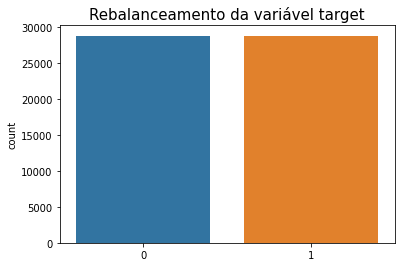

In [ ]:
fig, ax = plt.subplots()

sns.countplot(y_res, ax=ax)
ax.set_title("Rebalanceamento da variável target", size=15)

plt.show();

## **COMPARAÇÃO DE MODELOS**

Foram escolhidos quatro modelos de previsão de variáveis categóricas:

* Random Forest
* Decision Tree
* Logistic Regression
* XGBoost

In [ ]:
def val_model(X, y, clf, quite=False):

  X = np.array(X)
  y = np.array(y)

  pipeline = make_pipeline(StandardScaler(), clf)
  scores = cross_val_score(pipeline, X, y, cv=3, scoring='recall')

  if quite == False:
    print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
  return scores.mean()

#### **ESCOLHA DO MODELO E MÉTRICA UTILIZADA**

* A métrica escolhida para comparação de modelos foi a "Recall". Queremos dar ênfase aos acertos da variável "1", representativa do default. Logo, esta seria a melhor métrica para tal.

* O modelo escolhido foi o XGBoost, pelo seus valores estarem próximos dos demais modelos e por ser mais robusto em termos de otimização de hiperparâmetros e prevenção de overfitting.

In [ ]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()

model = []
recall = []
  
for clf in (rf, dt, lr, xgb):
  model.append(clf.__class__.__name__)
  recall.append(val_model(X_res, y_res, clf, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.83
DecisionTreeClassifier,0.80
LogisticRegression,0.73
XGBClassifier,0.78


## **MODELO - XGBOOST**

* Sem a otimização de hiperparâmetros, o modelo se mostrou bastante robusto ao classificar os clientes que não deram default.

* No entanto, para a classificação da variável 1 o modelo não se mostrou eficiente.

In [ ]:
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = X_encoded.columns)

In [ ]:
xgb.fit(X_res, y_res)

XGBClassifier()

In [ ]:
y_pred = xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5075
           1       0.68      0.31      0.43       970

    accuracy                           0.87      6045
   macro avg       0.78      0.64      0.68      6045
weighted avg       0.85      0.87      0.84      6045

AUC: 0.6427



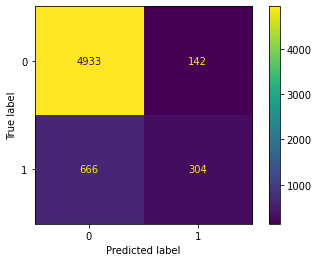

In [ ]:
print(classification_report(y_test, y_pred))

print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(xgb, X_test, y_test)

plt.show()

#### **FEATURE SELECTION**

* Foi feito uma análise das principais features que explicam o modelo.

* A seleção para um modelo de árvore de decisão é feita a partir do nível de impureza das folhas de classificação,em relação às variáveis.

* As variáveis que geram o maior nível de impureza são consideradas as menos explicativas para o modelo.

**TRATAMENTO**:

* Eliminação das variáveis que possuem grau explicativo menor do que 0.02 (média), a fim de otimizar os treinos com os hiperparâmetros e verificar se existe uma melhora nas previsões, visto que estamos eliminando variáveis com muitas impurezas.



In [ ]:
feat_importances = pd.DataFrame(xgb.feature_importances_, index=X_res.columns, columns=["importance"])
feat_importances.sort_values(by='importance', inplace=True)

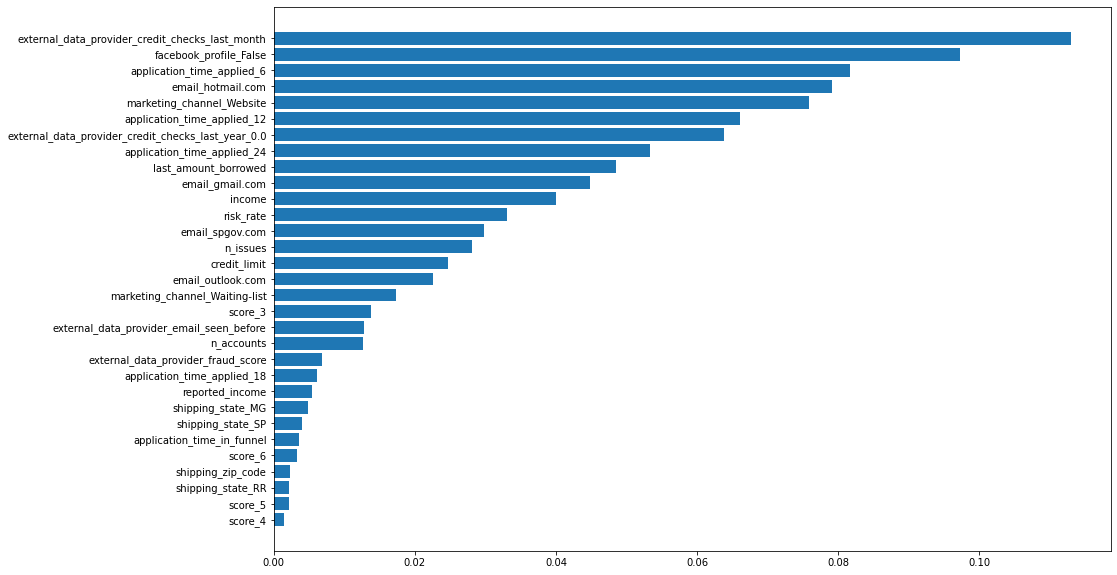

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

ax.barh(feat_importances.importance.loc[feat_importances.importance != 0].index, feat_importances.importance.loc[feat_importances.importance != 0])

plt.show()

In [ ]:
feat_importances.describe().T

,count,mean,std,min,25%,50%,75%,max
importance,64.00,0.02,0.03,0.00,0.00,0.00,0.02,0.11


In [ ]:
X_res_feat = X_res.copy()
X_test_feat = X_test.copy()

In [ ]:
feat_elimination = feat_importances.loc[feat_importances.importance<=0.02].index.to_list()

In [ ]:
X_res_feat.drop(columns=feat_elimination, inplace=True)
X_test_feat.drop(columns=feat_elimination, inplace=True)

In [ ]:
xgb.fit(X_res_feat, y_res)

XGBClassifier(seed=42)

In [ ]:
y_pred = xgb.predict(X_test_feat)

* As eliminações das variáveis geraram uma melhora na classificação da variável "1".

* Ainda assim, o nível de "Recall" para essa variável é baixo, necessitando, portanto, uma otimização dos hiperparâmetros para generalizar os nossos resultados, prevenindo "overfitting" e melhorando as previsões.

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5075
           1       0.68      0.35      0.46       970

    accuracy                           0.87      6045
   macro avg       0.78      0.66      0.69      6045
weighted avg       0.85      0.87      0.85      6045

AUC: 0.6596



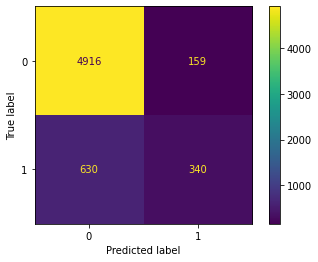

In [ ]:
print(classification_report(y_test, y_pred))

print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

plot_confusion_matrix(xgb, X_test_feat, y_test)

plt.show()

#### **OTIMIZAÇÃO DE HIPERPARÂMETROS**

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', seed=42, missing=None)

param_grid = {
 'n_estimators':range(0,400,50),
 'learning_rate':[0.001,0.01,0.1,0.3]
}

kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_res_feat, y_res)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.9408041179744018 para {'learning_rate': 0.3, 'n_estimators': 350}


              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5075
           1       0.86      0.71      0.78       970

    accuracy                           0.93      6045
   macro avg       0.90      0.84      0.87      6045
weighted avg       0.93      0.93      0.93      6045

AUC: 0.8425



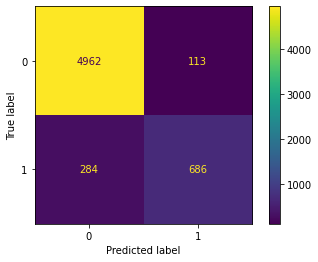

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', n_estimators=350, learning_rate=0.3, seed=42, missing=None)

xgb.fit(X_res_feat,
        y_res,
        verbose=True)

y_pred = xgb.predict(X_test_feat)

print(classification_report(y_test, y_pred))

print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

plot_confusion_matrix(xgb, X_test_feat, y_test)

plt.show()

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', n_estimators=350, learning_rate=0.3, seed=42, missing=None)

param_grid = {
 "max_depth": range(1,10,3),
 "min_child_weight": range(1,5,2)
}

kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_res_feat, y_res)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.9499860879243182 para {'max_depth': 7, 'min_child_weight': 1}


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5075
           1       0.88      0.74      0.80       970

    accuracy                           0.94      6045
   macro avg       0.91      0.86      0.88      6045
weighted avg       0.94      0.94      0.94      6045

AUC: 0.8603



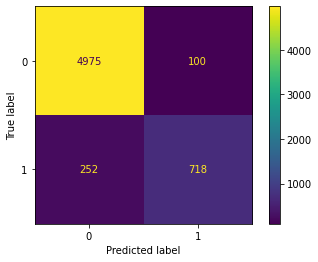

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', n_estimators=350, learning_rate=0.3, max_depth=7, min_child_weight=1, seed=42, missing=None)

xgb.fit(X_res_feat,
        y_res,
        verbose=True)

y_pred = xgb.predict(X_test_feat)

print(classification_report(y_test, y_pred))

print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

plot_confusion_matrix(xgb, X_test_feat, y_test)

plt.show()

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', n_estimators=350, learning_rate=0.3, max_depth=7, min_child_weight=1, seed=42, missing=None)

param_grid = {
 'gamma':[i/10.0 for i in range(1,5)]
}

kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_res_feat, y_res)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.9511686143572621 para {'gamma': 0.1}


              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5075
           1       0.86      0.73      0.79       970

    accuracy                           0.94      6045
   macro avg       0.91      0.85      0.88      6045
weighted avg       0.94      0.94      0.94      6045

AUC: 0.8540



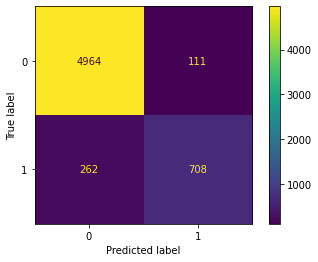

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', n_estimators=350, learning_rate=0.3, max_depth=7, min_child_weight=1, gamma=0.1, seed=42, missing=None)

xgb.fit(X_res_feat,
        y_res,
        verbose=True)

y_pred = xgb.predict(X_test_feat)

print(classification_report(y_test, y_pred))

print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

plot_confusion_matrix(xgb, X_test_feat, y_test)

plt.show()

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', n_estimators=350, learning_rate=0.3, max_depth=7, min_child_weight=1, gamma=0.1, seed=42, missing=None)

param_grid = {
 'subsample':[i/100.0 for i in range(60,120,20)],
 'colsample_bytree':[i/100.0 for i in range(60,120,20)]
}

kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_res_feat, y_res)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.9516207568169172 para {'colsample_bytree': 0.6, 'subsample': 1.0}


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5075
           1       0.88      0.74      0.80       970

    accuracy                           0.94      6045
   macro avg       0.91      0.86      0.88      6045
weighted avg       0.94      0.94      0.94      6045

AUC: 0.8580



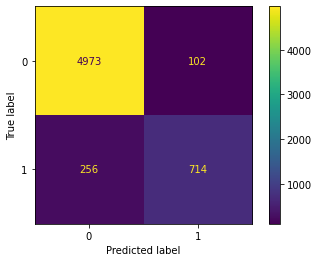

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', n_estimators=350, learning_rate=0.3, max_depth=7, min_child_weight=1, gamma=0.1, colsample_bytree=0.6, subsample=1, seed=42, missing=None)

xgb.fit(X_res_feat,
        y_res,
        verbose=True)

y_pred = xgb.predict(X_test_feat)

print(classification_report(y_test, y_pred))

print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

plot_confusion_matrix(xgb, X_test_feat, y_test)

plt.show()

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', n_estimators=350, learning_rate=0.3, max_depth=7, min_child_weight=1, gamma=0.1, colsample_bytree=0.6, subsample=1, seed=42, missing=None)

param_grid = {
    "reg_lambda": [i for i in range(1,10,2)]
}

kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_res_feat, y_res)

print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.9506816917084029 para {'reg_lambda': 3}


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5075
           1       0.88      0.74      0.80       970

    accuracy                           0.94      6045
   macro avg       0.92      0.86      0.88      6045
weighted avg       0.94      0.94      0.94      6045

AUC: 0.8589



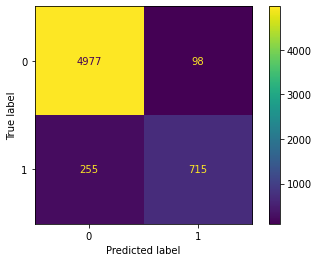

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', n_estimators=350, learning_rate=0.3, max_depth=7, min_child_weight=1, gamma=0.1, colsample_bytree=0.6, subsample=1, reg_lambda=3, seed=42, missing=None)

xgb.fit(X_res_feat,
        y_res,
        verbose=True)

y_pred = xgb.predict(X_test_feat)

print(classification_report(y_test, y_pred))

print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

plot_confusion_matrix(xgb, X_test_feat, y_test)

plt.show()

## **CONCLUSÃO**

* Após a otimização dos hiperparâmetros, o modelo gerou resultados bastante satisfatórios:

**Classificação - 0/Sem Default:**

* **Precision:** 95%
* **Recall:** 98%

**Classificações - 1/Default:**

* **Precision:** 88%
* **Recall:** 74%

**Avaliações gerais do modelo:**

* **AUC:** 86%
* **Accuracy:** 94% 


